In [2]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../Processed Data/Dataset#2 After Feature Extraction.csv", dtype={1: str}) #Reading in the CSV file into a Dataframe

In [4]:
df.shape

(11430, 18)

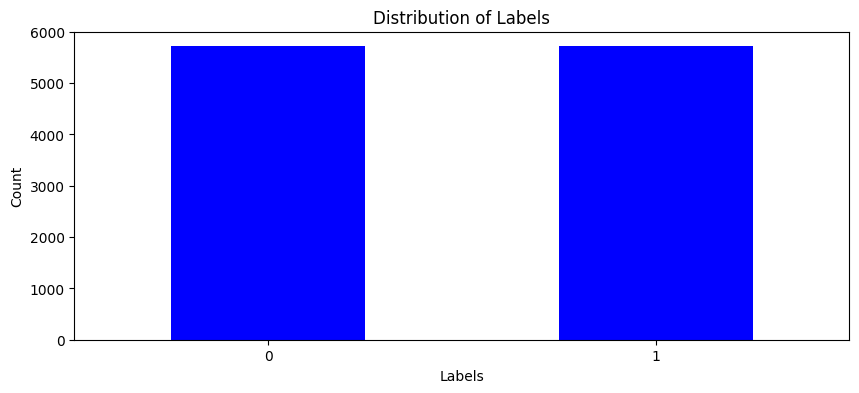

In [5]:
label_counts = df['Label'].value_counts()

plt.figure(figsize=(10, 4))
label_counts.plot(kind='bar', color='blue')
plt.title('Distribution of Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   URL                      11430 non-null  object
 1   Domain                   11430 non-null  object
 2   IP_Address               11430 non-null  int64 
 3   Prefix/Suffix_in_Domain  11430 non-null  int64 
 4   Tiny_URL                 11430 non-null  int64 
 5   @_Symbol                 11430 non-null  int64 
 6   URL_Length               11430 non-null  int64 
 7   Http/https_in_Domain     11430 non-null  int64 
 8   Depth_Of_URL             11430 non-null  int64 
 9   Redirection              11430 non-null  int64 
 10  Google_Index             11430 non-null  int64 
 11  WHOIS_Domain             11430 non-null  int64 
 12  DNS_Record               11430 non-null  int64 
 13  Registration_Length      11430 non-null  int64 
 14  Num_of_Dots              11430 non-nul

In [ ]:
df.describe()

,IP_Address,Prefix/Suffix_in_Domain,Tiny_URL,@_Symbol,URL_Length,Http/https_in_Domain,Depth_Of_URL,Redirection,Google_Index,WHOIS_Domain,DNS_Record,Registration_Length,Num_of_Dots,Num_of_Hyphens,Num_of_Underscore,Label
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000
mean,0.150569,0.202450,0.123447,0.021435,0.417060,0.001312,1.829746,0.006562,0.533946,0.072878,0.020122,492.532196,2.480665,0.997550,0.322660,0.500000
std,0.357644,0.401843,0.328964,0.144835,0.493095,0.036204,1.887386,0.080742,0.498868,0.259948,0.140425,814.769415,1.369685,2.087087,1.093336,0.500022
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,84.000000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,242.000000,2.000000,0.000000,0.000000,0.500000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,0.000000,449.000000,3.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,27.000000,1.000000,1.000000,1.000000,1.000000,29829.000000,24.000000,43.000000,18.000000,1.000000


In [9]:
df1 = df.drop(['Domain'], axis = 1).copy()

In [10]:
df1.isna().sum() #Checking if any NaN values exist in any of the columns of df1

URL                        0
IP_Address                 0
Prefix/Suffix_in_Domain    0
Tiny_URL                   0
@_Symbol                   0
URL_Length                 0
Http/https_in_Domain       0
Depth_Of_URL               0
Redirection                0
Google_Index               0
WHOIS_Domain               0
DNS_Record                 0
Registration_Length        0
Num_of_Dots                0
Num_of_Hyphens             0
Num_of_Underscore          0
Label                      0
dtype: int64

In [11]:
df1.isnull().sum() #Checking if any null values exist in any of the columns of df1

URL                        0
IP_Address                 0
Prefix/Suffix_in_Domain    0
Tiny_URL                   0
@_Symbol                   0
URL_Length                 0
Http/https_in_Domain       0
Depth_Of_URL               0
Redirection                0
Google_Index               0
WHOIS_Domain               0
DNS_Record                 0
Registration_Length        0
Num_of_Dots                0
Num_of_Hyphens             0
Num_of_Underscore          0
Label                      0
dtype: int64

In [12]:
df_shuffled = df1.sample(frac=1).reset_index(drop=True) #Shuffling the entries of df1

In [13]:
df_shuffled.head()

,URL,IP_Address,Prefix/Suffix_in_Domain,Tiny_URL,@_Symbol,URL_Length,Http/https_in_Domain,Depth_Of_URL,Redirection,Google_Index,WHOIS_Domain,DNS_Record,Registration_Length,Num_of_Dots,Num_of_Hyphens,Num_of_Underscore,Label
0,http://part.eyrehead.com/bzp?kl=ZH9wlG9qbGKclb...,0,0,0,1,1,0,1,0,1,0,0,217,4,0,0,1
1,https://www.facebook.com/CBSThisMorning/,0,0,0,0,0,0,1,0,0,0,0,2807,2,0,0,0
2,http://www.choose-piano-lessons.com/piano-keys...,0,0,0,0,0,0,1,0,0,0,0,124,3,3,0,0
3,https://hdsupply.allegiancetech.com/cgi-bin/qw...,0,1,0,0,1,0,2,0,1,0,0,289,3,1,0,1
4,http://paulbourke.net/geometry/pointlineplane/,0,0,0,0,0,0,2,0,0,0,0,941,1,0,0,0


In [14]:
y = df_shuffled['Label']
X = df_shuffled.drop(['URL', 'Label'], axis = 1)

In [15]:
# Trainsing set: 70%
# Validating set: 15%
# Testing set: 15%


X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=10
)


In [16]:
X_val, X_test, y_val, y_test = train_test_split(
    X_test, y_test, 
    test_size=0.5, 
    random_state=10
)

In [17]:
X_train.shape

(8001, 15)

In [18]:
X_val.shape

(1714, 15)

In [19]:
X_test.shape

(1715, 15)

In [20]:
y_train = y_train.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)



In [21]:
X_train.to_csv("Training Dataset/X_train #2.csv")
X_val.to_csv("Validation Dataset/X_val #2.csv")
X_test.to_csv("Testing Dataset/X_test #2.csv")

y_train.to_csv("Training Dataset/y_train #2.csv")
y_val.to_csv("Validation Dataset/y_val #2.csv")
y_test.to_csv("Testing Dataset/y_test #2.csv")